In [ ]:
"""
To package the suggested edits into a function that can be applied to 
any neuron object



"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

INFO - 2020-12-23 12:36:12,745 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-23 12:36:12,747 - settings - Setting database.user to celiib
INFO - 2020-12-23 12:36:12,748 - settings - Setting database.password to newceliipass
INFO - 2020-12-23 12:36:12,776 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-12-23 12:36:12,777 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-23 12:36:12,791 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-12-23 12:36:13,015 - settings - Setting enable_python_native_blobs to True


In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2020-12-23 12:36:13,114 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-23 12:36:13,340 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [6]:
minnie.DecompositionMultiSoma() & "n_somas>=2" & "n_limbs>7"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134988402042,0,0.25,=BLOB=,939750,1891203,1,0,1,2,11,260,129,9926423.076049272,3837120.3077007174,19498.793,99.274,99.274,489.663,475.385,3464,0.00034896759622890023,13.323076923076924,6602403.65,127,nan,nan,158333783964.6377,22787252.596668243,15950.739027703696,23981.233556454503,1246722708.382974,2086.0103
864691134988472442,0,0.25,=BLOB=,760380,1540479,2,2,1,2,13,363,156,8953235.669383887,4544614.922947489,14310.191,84.402,84.402,468.087,373.666,2735,0.0003054761542078572,7.534435261707989,3995011.885,125,nan,nan,141833693783.9872,29636743.193003334,15841.612911966098,35502.696329021615,1134669550.2718978,2332.3713
864691135012400886,0,0.25,=BLOB=,802480,1644474,1,1,1,2,16,269,96,7875858.169030763,2360988.8843716034,18603.612,255.953,230.461,454.247,405.981,3810,0.00048375680697013807,14.1635687732342,6797185.75,192,nan,nan,237479305298.37152,35811946.28458786,30152.816391765566,34937.88665380691,1236871381.7623518,10256.3515
864691135081658359,0,0.25,=BLOB=,1607079,3235599,2,2,1,2,16,566,222,17383118.66936267,6172738.160942182,16478.245,104.692,104.692,487.313,428.015,6643,0.000382152370144497,11.736749116607774,10212426.203,268,nan,nan,279434899541.12573,20787632.10667928,16075.072882843688,27362.24419022377,1042667535.6012154,24169.9911
864691135103989069,0,0.25,=BLOB=,1245458,2502307,1,0,1,2,16,331,79,11756897.144402271,2465284.4707440175,20465.579,321.001,265.448,491.55,445.508,5678,0.0004829505549177511,17.154078549848943,8429003.434,209,nan,nan,303415329029.90393,27481356.392502148,25807.432463110978,35996.583867319365,1451747985.789014,7967.3317
864691135207768697,0,0.25,=BLOB=,1067465,2149606,2,1,1,2,17,260,85,8946738.643342396,2846658.3866573754,23190.431,358.987,309.871,566.021,515.849,4621,0.0005165010608014865,17.773076923076925,7806528.505,214,nan,nan,294025101920.43787,27074805.833293915,32863.942229857465,37664.0015766442,1373949074.3945694,19055.2293
864691135210033344,0,0.25,=BLOB=,1093479,2238756,2,1,1,2,11,367,186,11431382.161309652,5830748.601730345,16936.767,188.963,185.938,437.996,402.889,4500,0.0003936531852841539,12.26158038147139,7261235.173,202,nan,nan,276047625630.4887,31026774.45333735,24148.228248793228,38016.621009182774,1366572404.1113303,18653.8569
86469

In [7]:
segment_id = 864691135012400886 

In [9]:
neuron_obj = (minnie.DecompositionMultiSoma & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [10]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Preview of How th Neuron Will Need to be Split

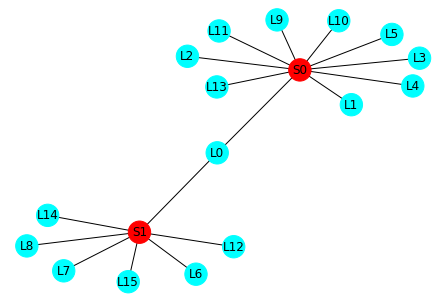

In [11]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [12]:
multi_soma_limbs = nru.multi_soma_touching_limbs(neuron_obj)
multi_soma_limbs

array([0])

In [13]:
multi_touch_limbs = nru.same_soma_multi_touching_limbs(neuron_obj)
multi_touch_limbs

array([0])

In [14]:
total_limbs_to_process = np.unique(np.concatenate([multi_soma_limbs,multi_touch_limbs]))
total_limbs_to_process

array([0])

# Starting the Function

multi_soma_limbs = [0]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [(7, 30), (7, 24), (30, 24)]


---- working on disconnecting 7 and 30
---- This disconnects S1_0 from S1_1  
 Cut iteration 0
Shortest path = [ 7 14 10 33 28 25 26 55 54 29 30]
Found 1 high degree coordinates to cut
Picking [852649. 445385. 726053.] high degree coordinates to cut
coordinate_branches = [ 2 10 33 34]
2 = red
10 = aqua
33 = purple
34 = green
Angle between 2 and 10 = 24.87 
Angle between 2 and 33 = 56.99 
Angle between 2 and 34 = 115.25 
Angle between 10 and 33 = 128.76 
Angle between 10 and 34 = 48.44 
Angle between 33 and 34 = 22.82 
Final Matches = [[2, 10], [33, 34]]
Original graph


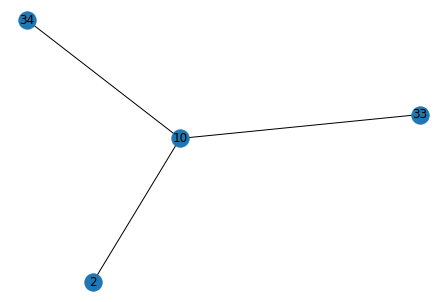

edges_to_delete = [array([10, 33]), array([10, 34])]
edges_to_create = [array([33, 34])]
edges_to_delete = [array([10, 33]), array([10, 34])]
edges_to_create = [array([33, 34])]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 31, 32, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 87, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 1 = {23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 82, 83, 84, 85, 86}
 Cut iteration 1
No valid path so moving onto the next connection


---- working on disconnecting 7 and 24
---- This disconnects S1_0 from S0_0  
 Cut iteration 0
No valid path so moving onto the next connection


---- working on disconnecting 30 and 24
---- This disconnects S1_1 from S0_0  
 Cut iteration 0
Shortest path = [30 29 54 55 26 25 24]
Found 0 high degree coordinates to cut

Atte

In [100]:
import proofreading_utils as pru
import error_detection as ed
import skeleton_utils as sk
pru = reload(pru)
sk = reload(sk)
ed = reload(ed)
limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)

# Trying to  Split Some of the limbs

In [ ]:
limb_results

In [95]:
neuron_obj[0].concept_network

In [94]:
nx.number_connected_components(neuron_obj[0].concept_network)

1

In [101]:
nviz = reload(nviz)
nviz.plot_split_suggestions_per_limb(neuron_obj,
                                    limb_results,
                                    scatter_size = 0.2)



-------- Suggestions for Limb 0------

 Working on visualization type: mesh

 Working on visualization type: skeleton


# Try and Split the limb concept network

In [125]:
new_concept_networks = pru.split_suggestions_to_concept_networks(neuron_obj,limb_results)

split_limbs = list(new_concept_networks.keys())
curr_limb_idx = int(split_limbs[0])
print(f"Working on Limb {curr_limb_idx}")

conn_comp = list(nx.connected_components(new_concept_networks[curr_limb_idx]))


Working on Limb 0


In [132]:
import copy
conn_comp_revised = [list(k) for k in conn_comp]
conn_comp_revised[2] = [54,53]
conn_comp_revised.append([29,30,71])

In [128]:
new_graph = neuron_obj[curr_limb_idx].concept_network.subgraph(conn_comp_revised[2])
new_graph.nodes()

NodeView((71, 53, 54, 29, 30))

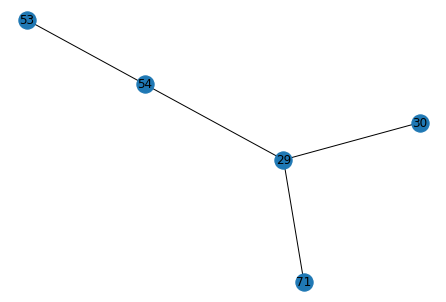

In [129]:
import matplotlib.pyplot as plt
nx.draw(new_graph,with_labels=True)
plt.show()

In [136]:
split_neuron_obj = pru.split_neuron_limb(neuron_obj,conn_comp_revised,
                     curr_limb_idx = curr_limb_idx)




----Working on seperate_graph 0----


---------Working on soma_idx = 1, soma_group_idx 0, endpt = [864429. 447634. 720704.]---------
Starting_edge inside branches_to_conept = [[864186. 446734. 721077.]
 [864429. 447634. 720704.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [21]
printing out current edge:
[[864429. 447634. 720704.]
 [864186. 446734. 721077.]]
edge_endpoints_to_process was empty so exiting loop after 59 iterations
starting_node in concept map (that should match the starting edge) = 7
Total time for branches to concept conversion = 1.3805968761444092

Done generating concept network 


recovered_touching_piece = [7]
concept_network_dict = {1: [<networkx_utils.GraphOrderedEdges object at 0x7fd8696228d0>]}
checking and resolving cycles
No cycles to fix


----Working on seperate_graph 1----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [838562. 426247. 690865.]---------
Starting_edge inside branches_to_co

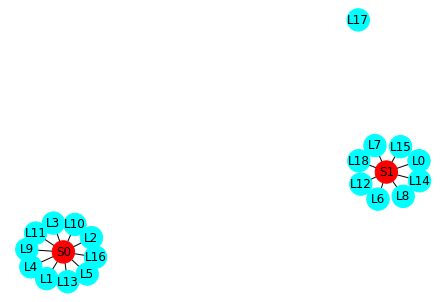

In [137]:
nviz.plot_soma_limb_concept_network(split_neuron_obj)

In [139]:
split_neuron_obj.save_compressed_neuron(output_folder="./",
                                       file_name="floating_example",
                                       export_mesh=True)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: floating_example


In [144]:
import neuron 
neuron = reload(neuron)
file_loc = "./floating_example"
recovered_neuron_obj = nru.decompress_neuron(file_loc,file_loc,suppress_output=False)

Inside decompress neuron and decomposition_type = meshafterparty
Passed faces original mesh check
Passed vertices original mesh check
Working on limb 1
  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5
  Working on branch 6
  Working on branch 7
  Working on branch 8
  Working on branch 9
  Working on branch 10
  Working on branch 11
  Working on branch 12
  Working on branch 13
  Working on branch 14
  Working on branch 15
  Working on branch 16
  Working on branch 17
  Working on branch 18
  Working on branch 19
  Working on branch 20
  Working on branch 21
  Working on branch 22
  Working on branch 23
  Working on branch 24
Working on limb 2
  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5
  Working on branch 6
  Working on branch 7
  Working on branch 8
  Working on branch 9
  Working on branch 10
  Working on branch 11

At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [5]
printing out current edge:
[[837417. 415344. 691571.]
 [838255. 411394. 695834.]]
edge_endpoints_to_process was empty so exiting loop after 9 iterations
starting_node in concept map (that should match the starting edge) = 3
Total time for branches to concept conversion = 0.2519989013671875

Done generating concept network 


recovered_touching_piece = [3]


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [830962. 422009. 687445.]---------
Starting_edge inside branches_to_conept = [[822920. 425628. 690862.]
 [830962. 422009. 687445.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [6]
printing out current edge:
[[830962. 422009. 687445.]
 [822920. 425628. 690862.]]
edge_endpoints_to_process was empty so exiting loop after 6 iterations
starting_node in concept map (that should match the starting edge) = 1
Total time for branche



---------Working on soma_idx = 1, soma_group_idx 0, endpt = [864429. 447634. 720704.]---------
Starting_edge inside branches_to_conept = [[864186. 446734. 721077.]
 [864429. 447634. 720704.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [21]
printing out current edge:
[[864429. 447634. 720704.]
 [864186. 446734. 721077.]]
edge_endpoints_to_process was empty so exiting loop after 59 iterations
starting_node in concept map (that should match the starting edge) = 7
Total time for branches to concept conversion = 1.092214822769165

Done generating concept network 


recovered_touching_piece = [7]


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [838562. 426247. 690865.]---------
Starting_edge inside branches_to_conept = [[838562. 426247. 690865.]
 [840038. 430481. 695895.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [8]
printing out current edge:
[[838562. 426247. 690865

checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {1: [<networkx_utils.GraphOrderedEdges object at 0x7fd868d0cd68>]}
concept_network_dict = {1: [<networkx_utils.GraphOrderedEdges object at 0x7fd868d0cd68>]}
checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7fd868d0ce48>]}
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7fd868d0ce48>]}
checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {-1: [<networkx_utils.GraphOrderedEdges object at 0x7fd86de7e940>]}
concept_network_dict = {-1: [<networkx_utils.GraphOrderedEdges object at 0x7fd86de7e940>]}
checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {1: [<networkx_utils.GraphOrderedEdges object at 0x7fd868caac88>]}
concept_network_dict = {1: [<networkx_utils.GraphOrderedEdges object at 0x7fd868caac88>]}
checking and resolving cycles
No cycles to fix
--- 4) Finshed generati

     Branch 17
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(13603, 3), faces.shape=(27049, 3))>
     Branch 18
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(8113, 3), faces.shape=(16056, 3))>
     Branch 19
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(9859, 3), faces.shape=(19647, 3))>
     Branch 20
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(950, 3), faces.shape=(1814, 3))>
     Branch 21
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(9021, 3), faces.shape=(17961, 3))>
     Branch 22
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(447, 3), faces.shape=(772, 3))>
     Branch 23
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(8062, 3), faces.shape=(16035, 3))>
     Branch 24
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(741, 3), faces.shape=(1476, 3))>
Working on Limb 2:
     Branch 0
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1984, 3), faces.shape=(3915, 3))>
     Branch 1
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(5821,

     Branch 1
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(9997, 3), faces.shape=(19910, 3))>
     Branch 2
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(287, 3), faces.shape=(535, 3))>
Working on Limb 11:
     Branch 0
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1395, 3), faces.shape=(2740, 3))>
     Branch 1
     Branch 2
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(810, 3), faces.shape=(1547, 3))>
     Branch 3
     Branch 4
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(5962, 3), faces.shape=(11876, 3))>
     Branch 5
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(770, 3), faces.shape=(1507, 3))>
     Branch 6
     Branch 7
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(3969, 3), faces.shape=(7910, 3))>
     Branch 8
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1985, 3), faces.shape=(3951, 3))>
     Branch 9
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(3002, 3), faces.shape=(5968, 3))>
Working on Limb 12:
     Branch 0
curr_b

In [148]:
curr_limb = recovered_neuron_obj[17]

In [149]:
curr_limb.all_concept_network_data

[{'starting_soma': -1,
  'starting_node': 1,
  'starting_endpoints': array([[841321.82956213, 523530.52581405, 715817.53170154],
         [857835.        , 468652.        , 704658.        ]]),
  'starting_coordinate': array([841321.82956213, 523530.52581405, 715817.53170154]),
  'touching_soma_vertices': None,
  'soma_group_idx': -1,
  'concept_network': <networkx_utils.GraphOrderedEdges at 0x7fd86de7e940>}]

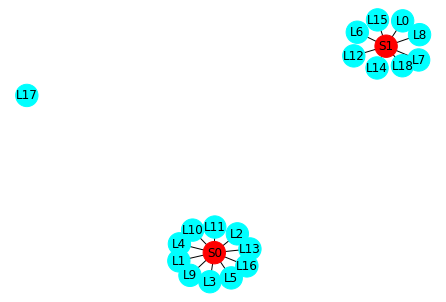

In [146]:
nviz.plot_soma_limb_concept_network(recovered_neuron_obj)

In [113]:
nviz.visualize_neuron(split_neuron_obj,
                      visualize_type=["mesh"],
                     limb_branch_dict="all",
                     mesh_resolution="limb")


 Working on visualization type: mesh


# Splitting Into Multiple Neuron Objects

In [156]:
split_neuron_obj.preprocessed_data.keys()

dict_keys(['soma_meshes', 'soma_to_piece_connectivity', 'soma_sdfs', 'soma_volume_ratios', 'insignificant_limbs', 'not_processed_soma_containing_meshes', 'non_soma_touching_meshes', 'inside_pieces', 'limb_meshes', 'limb_correspondence', 'limb_concept_networks', 'limb_labels', 'limb_network_stating_info'])

In [155]:
nviz.plot_objects(meshes=split_neuron_obj.preprocessed_data["inside_pieces"],
                 meshes_colors="random")

# Trying the Alterations for splitting neuron object into multiple

In [185]:
import networkx_utils as xu
import trimesh_utils as tu

In [159]:
# check that there are no error limbs at this point
import neuron_utils as nru
curr_error_limbs = nru.error_limbs(split_neuron_obj)

if len(curr_error_limbs) > 0:
    raise Exception(f"There were still error limbs before trying the neuron object split: error limbs = {curr_error_limbs}")

In [173]:

soma_names = split_neuron_obj.get_soma_node_names()

In [274]:
# getting the current_soma

neuron_cp = copy.deepcopy(split_neuron_obj)
curr_soma_name = soma_names[curr_soma_idx]
soma_obj = neuron_cp[curr_soma_name]


soma_obj

In [275]:
#getting all the soma information we will need for preprocessing

curr_soma_meshes = [soma_obj.mesh]
curr_soma_sdfs = [soma_obj.sdf]
curr_soma_volume_ratios = [soma_obj.volume_ratio]

curr_soma_meshes,curr_soma_sdfs,curr_soma_volume_ratios

([<trimesh.Trimesh(vertices.shape=(13131, 3), faces.shape=(25960, 3))>],
 [0.847],
 [4.171624833439278])

In [282]:
# getting the limb information
limb_neighbors = np.sort(xu.get_neighbors(neuron_cp.concept_network,curr_soma_name)).astype("int")
limb_neighbors = [int(k) for k in limb_neighbors]


#making sure it matches with the soma connectivity
soma_to_piece_connectivity = neuron_cp.preprocessed_data["soma_to_piece_connectivity"][curr_soma_idx]

if len(np.intersect1d(limb_neighbors,soma_to_piece_connectivity)) < len(soma_to_piece_connectivity):
    raise Exception(f"piece connectivity ({soma_to_piece_connectivity}) not match limb neighbors ({limb_neighbors})")

curr_soma_to_piece_connectivity = {0:np.arange(0,len(limb_neighbors))}
curr_soma_to_piece_connectivity

{0: array([0, 1, 2, 3, 4, 5, 6, 7])}

In [283]:
limb_neighbors

[0, 6, 7, 8, 12, 14, 15, 18]

In [288]:
neuron_cp[6].mesh,

<trimesh.Trimesh(vertices.shape=(36473, 3), faces.shape=(72746, 3))>

In [289]:
# get the whole mesh
import time

st_time = time.time()

#list to be concatenated into whole mesh
mesh_list_for_whole = [soma_obj.mesh]

#for the limb meshes
limb_meshes = []

#for the limb mesh faces idx
counter = len(curr_soma_meshes[0].faces)
face_idx_list = [np.arange(0,counter)]

old_node_to_new_node_mapping = dict()


for i,k in  enumerate(limb_neighbors):
    
    #getting the name mapping
    old_node_to_new_node_mapping[k] = i
    
    #getting the meshes of the limbs
    limb_mesh = neuron_cp[k].mesh
    limb_meshes.append(limb_mesh)
    
    
    mesh_list_for_whole.append(limb_mesh)
    face_length = len(limb_mesh.faces)
    face_idx_list.append(np.arange(counter,counter + face_length))
    counter += face_length

print(f"time for preprocess = {time.time() - st_time}")
st_time = time.time()
whole_mesh = tu.combine_meshes(mesh_list_for_whole)
print(f"time for concatenation = {time.time() - st_time}")
whole_mesh,face_idx_list[-1][-1]


time for preprocess = 0.001211404800415039
time for concatenation = 0.21195411682128906


(<trimesh.Trimesh(vertices.shape=(297964, 3), faces.shape=(593212, 3))>,
 593211)

In [291]:
nviz.plot_objects(whole_mesh)

# Generating the New limb correspondence

In [292]:
curr_limb_correspondence = dict([(i,neuron_cp.preprocessed_data["limb_correspondence"][k]) for i,k in enumerate(limb_neighbors)])
curr_limb_correspondence

{0: {0: {'branch_skeleton': array([[[833316., 418696., 717621.],
           [833423., 418647., 717579.]],
   
          [[833423., 418647., 717579.],
           [833497., 418614., 717550.]],
   
          [[833497., 418614., 717550.],
           [833600., 418569., 717508.]],
   
          [[833600., 418569., 717508.],
           [833697., 418527., 717468.]],
   
          [[833697., 418527., 717468.],
           [833926., 418430., 717376.]],
   
          [[833926., 418430., 717376.],
           [834135., 418346., 717297.]],
   
          [[834135., 418346., 717297.],
           [834322., 418275., 717231.]],
   
          [[834322., 418275., 717231.],
           [834472., 418219., 717180.]],
   
          [[834472., 418219., 717180.],
           [834564., 418187., 717150.]],
   
          [[834564., 418187., 717150.],
           [834643., 418159., 717124.]],
   
          [[834643., 418159., 717124.],
           [834816., 418102., 717070.]],
   
          [[834816., 418102., 717070.],


# changing all the concept network stuff

In [295]:
# curr_limb_network_stating_info = {old_node_to_new_node_mapping[k]: for k in limb_neighbors}
curr_limb_network_stating_info = dict()


for k in limb_neighbors:
    
    local_starting_info = neuron_cp.preprocessed_data["limb_network_stating_info"][k]
    
    #making sure the soma has the right name
    soma_keys = list(local_starting_info.keys())
    if len(soma_keys) > 1:
        raise Exception("More than one soma connection")
    else:
        soma_key = soma_keys[0]
    
    if soma_key != 0:
        local_starting_info = {0:local_starting_info[soma_key]}
        
        
    #making sure the soma group has the right name
    starting_group_keys = list(local_starting_info[0].keys())
    if len(starting_group_keys) > 1 or starting_group_keys[0] != 0:
        raise Exception("Touching group was not equal to 0")
    
    #save the new starting info
    curr_limb_network_stating_info[old_node_to_new_node_mapping[k]] = local_starting_info
    
curr_limb_network_stating_info

{0: {0: {0: {'touching_verts': TrackedArray([[865477.8, 447765.4, 719070.3],
                  [863709. , 448523.2, 719276.2],
                  [863031.1, 448596.1, 720275.6],
                  [864848.2, 447767.2, 722337. ],
                  [863494.6, 448174.5, 722304.3],
                  [863167.6, 448300.2, 721016.2],
                  [865977.1, 447824.4, 719716.1],
                  [863022.6, 448681.2, 720389.8],
                  [865716.1, 447935.3, 719150.4],
                  [865719.4, 447786.7, 719269.4],
                  [864977.8, 447668.4, 718973.8],
                  [863283.8, 447987.8, 721917. ],
                  [863299.2, 447898.4, 722137. ],
                  [863283.8, 448581. , 719523. ],
                  [863004.9, 448505. , 720391.7],
                  [863940. , 447846. , 722505. ],
                  [865628.2, 447815.8, 719118.9],
                  [863111.4, 448182. , 720812.8],
                  [865940.2, 447693.8, 719612.2],
                  [8654

In [296]:
curr_limb_labels = dict()

for k in limb_neighbors:
    local_limb_labels = neuron_cp.preprocessed_data["limb_labels"][k]
    if local_limb_labels is None or local_limb_labels == "Unlabeled":
        local_limb_labels = []
    
    local_limb_labels.append(f"Soma_{curr_soma_idx}_originally")
    curr_limb_labels[old_node_to_new_node_mapping[k]] = local_limb_labels
    
curr_limb_labels

{0: ['split_limb_from_0_part_0', 'Soma_1_originally'],
 1: ['Soma_1_originally'],
 2: ['Soma_1_originally'],
 3: ['Soma_1_originally'],
 4: ['Soma_1_originally'],
 5: ['Soma_1_originally'],
 6: ['Soma_1_originally'],
 7: ['split_limb_from_0_part_3', 'Soma_1_originally']}

In [297]:
import preprocessing_vp2 as pre

# creating the new concept networks
curr_limb_concept_networks=dict()

for curr_limb_idx,new_limb_correspondence_indiv in curr_limb_correspondence.items():
    limb_to_soma_concept_networks = pre.calculate_limb_concept_networks(new_limb_correspondence_indiv,
                                                                        curr_limb_network_stating_info[curr_limb_idx],
                                                                        run_concept_network_checks=True,
                                                                       )   

    curr_limb_concept_networks[curr_limb_idx] = limb_to_soma_concept_networks



---------Working on soma_idx = 0, soma_group_idx 0, endpt = [864429. 447634. 720704.]---------
Starting_edge inside branches_to_conept = [[864186. 446734. 721077.]
 [864429. 447634. 720704.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [21]
printing out current edge:
[[864429. 447634. 720704.]
 [864186. 446734. 721077.]]
edge_endpoints_to_process was empty so exiting loop after 59 iterations
starting_node in concept map (that should match the starting edge) = 7
Total time for branches to concept conversion = 1.1272892951965332

Done generating concept network 


recovered_touching_piece = [7]


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [859440.73823529 456365.25588235 718522.13823529]---------
Starting_edge inside branches_to_conept = [[857058.64805771 457237.48299023 716477.58357886]
 [859440.73823529 456365.25588235 718522.13823529]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the

# create the new preprocessing data

In [298]:
new_preprocessed_data = preprocessed_data= dict(
        #soma data
        soma_meshes = curr_soma_meshes,
        soma_sdfs = curr_soma_sdfs,
        soma_volume_ratios=curr_soma_volume_ratios,
    
        #soma connectivity
        soma_to_piece_connectivity = curr_soma_to_piece_connectivity,

        # limb info
        limb_correspondence=curr_limb_correspondence,
        limb_meshes=limb_meshes,
        limb_mehses_face_idx = face_idx_list,
        limb_labels=curr_limb_labels,
    
        #concept network info
        limb_concept_networks=curr_limb_concept_networks,
        limb_network_stating_info=curr_limb_network_stating_info,
        
    
        # the other mesh pieces that will not be included
        insignificant_limbs=None,
        not_processed_soma_containing_meshes=None,
        non_soma_touching_meshes=None,
        inside_pieces=None,
    
        
        )

limb_to_branch_objects = dict()
for k in limb_neighbors:
    limb_obj = neuron_cp[int(k)]
    branch_dict = dict([(b,limb_obj[int(b)]) for b in limb_obj.get_branch_names()])
    limb_to_branch_objects[old_node_to_new_node_mapping[k]] = branch_dict
    
segment_id = neuron_cp.segment_id
description = f"{neuron_cp.description}_soma_{curr_soma_idx}_split"

In [299]:
single_split_neuron_obj = neuron.Neuron(mesh=whole_mesh,
             segment_id=segment_id,
             description=description,
             preprocessed_data=new_preprocessed_data,
             limb_to_branch_objects=limb_to_branch_objects,
             widths_to_calculate=[])

Already have preprocessed data
--- 1) Finished unpacking preprocessed materials: 8.749961853027344e-05
total_edges = [['S0', 'L0'], ['S0', 'L1'], ['S0', 'L2'], ['S0', 'L3'], ['S0', 'L4'], ['S0', 'L5'], ['S0', 'L6'], ['S0', 'L7']]
--- 2) Finished creating neuron connectivity graph: 0.00013303756713867188
Having to generate soma_meshes_face_idx because none in preprocessed data
--- 3a) Finshed generating soma_meshes_face_idx: 0.37157344818115234
Using precomputed volume ratio
--- 3) Finshed generating soma objects and adding them to concept graph: 0.09967470169067383
Using already existing limb_mehses_face_idx in preprocessed data 
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7fd8401dbda0>]}
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7fd8401dbda0>]}
checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7fd8401dbf60>]}
concept_network_dict = {0: [<networ

In [300]:
nviz.visualize_neuron(single_split_neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton
